In [1]:
#import library and read the dataset
import pandas as pd
data = pd.read_csv('estate_data.csv')

In [2]:
#now remove adddress and date from data
dataset = data.drop(['address', 'date'], axis = 1)
dataset.head()

,number_of_rooms,floor,area,price
0,1,1,58.0,330000
1,1,14,68.0,340000
2,3,8,50.0,700000
3,3,14,84.0,700000
4,3,3,83.0,415000


In [22]:
import plotly.express as px

figure = px.bar(dataset, x = 'floor', y = 'price', animation_frame= 'number_of_rooms')
figure.update_layout(title = "Area VS Price", xaxis_title = "Number of Floors", yaxis_title = "Price")
figure.show()

In [19]:
import plotly.express as px
fig = px.scatter(dataset, x = 'number_of_rooms', y = 'price', color = 'price', title = 'Number of rooms VS Price')
# fig.title("Rooms VS Price")
# fig.xlabel("Number of Rooms")
# fig.ylabel("Price")
fig.show()

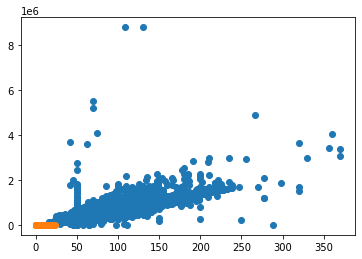

In [17]:
import matplotlib.pyplot as plt
plt.plot(dataset.area, dataset.price, linestyle = '', marker = 'o', markersize = 6, label = 'area')
plt.plot(dataset.floor, dataset.number_of_rooms, marker = 'o', linestyle = '', label = 'floor')

(array([5.55e+03, 2.40e+01, 3.00e+00, 2.00e+00]),
 array([3.9000000e+02, 2.2037925e+06, 4.4071950e+06, 6.6105975e+06,
        8.8140000e+06]),
 <BarContainer object of 4 artists>)

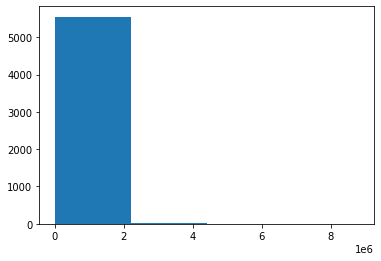

In [23]:
plt.hist(dataset.price, bins = 4)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

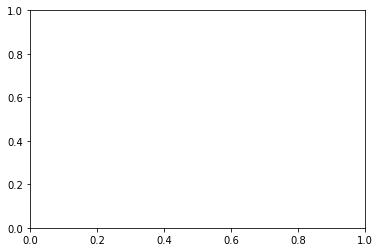

In [26]:
import numpy as np
fig, ax = plt.subplots()
ax.barh(np.arange(10), dataset.iloc[0:10])
ax.set_yticks(np.arange(0.4, 10.4, 1))
ax.set_yticklabels(np.arrange(1, 11))


In [39]:
x = dataset.iloc[:, -3:]
x

,floor,area,price
0,1,58.0,330000
1,14,68.0,340000
2,8,50.0,700000
3,14,84.0,700000
4,3,83.0,415000
...,...,...,...
5574,16,125.0,600000
5575,17,71.0,489900
5576,9,51.0,361220
5577,6,200.0,1500000


In [28]:
#finding correaltion of dependent variables and independent variables
hous_num = dataset.select_dtypes(include = ['float64', 'int64'])
hous_num_corr = hous_num.corr()['price'][:-1] # -1 means that the latest row is SalePrice
top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 2 strongly correlated values with SalePrice:
area               0.718130
number_of_rooms    0.594876
Name: price, dtype: float64


/home/uca/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


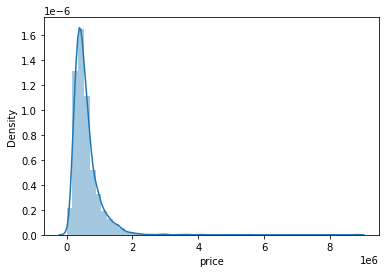

In [29]:
#now lets find normality of target variable
import seaborn as sb

normality = sb.distplot(dataset['price'])

In [30]:
#find skewness in the plot
dataset['price'].skew()

5.235117769537853

In [31]:
#so skewnees is very large and now apply log function and reduce the skewness
import numpy as np
applied_log = np.log(dataset['price'])

In [32]:
applied_log.skew()

-1.5123189977207456

/home/uca/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

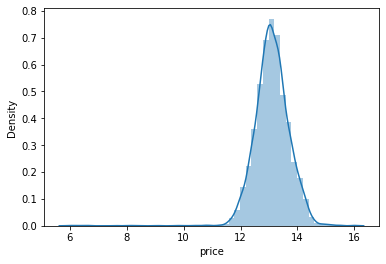

In [33]:
sb.distplot(applied_log)

In [35]:
from sklearn.preprocessing import StandardScaler
data1 = dataset['price']
data1

0        330000
1        340000
2        700000
3        700000
4        415000
         ...   
5574     600000
5575     489900
5576     361220
5577    1500000
5578     304650
Name: price, Length: 5579, dtype: int64

In [38]:
stand = StandardScaler().fit_transform(data1)

ValueError: Expected 2D array, got 1D array instead:
array=[ 330000.  340000.  700000. ...  361220. 1500000.  304650.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [38]:
iris_data = pd.read_csv('Iris.csv')

In [39]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='Species'>

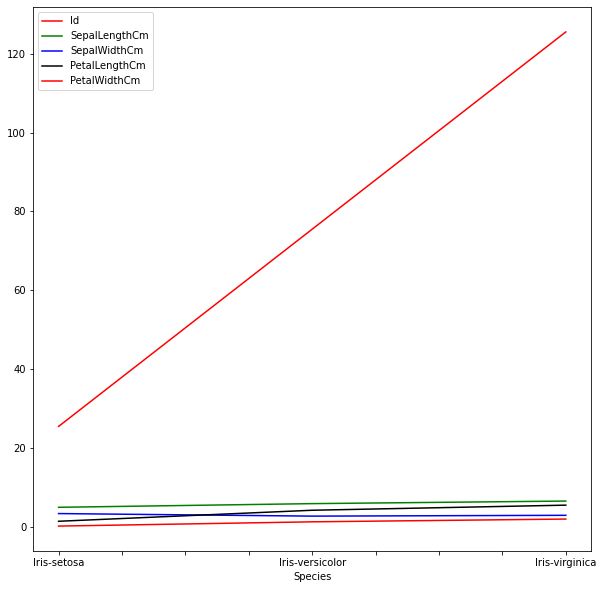

In [40]:
iris_data.groupby('Species').mean().plot(color = ['red', 'green', 'blue', 'black'], fontsize = 10, figsize = (10, 10))

/home/uca/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


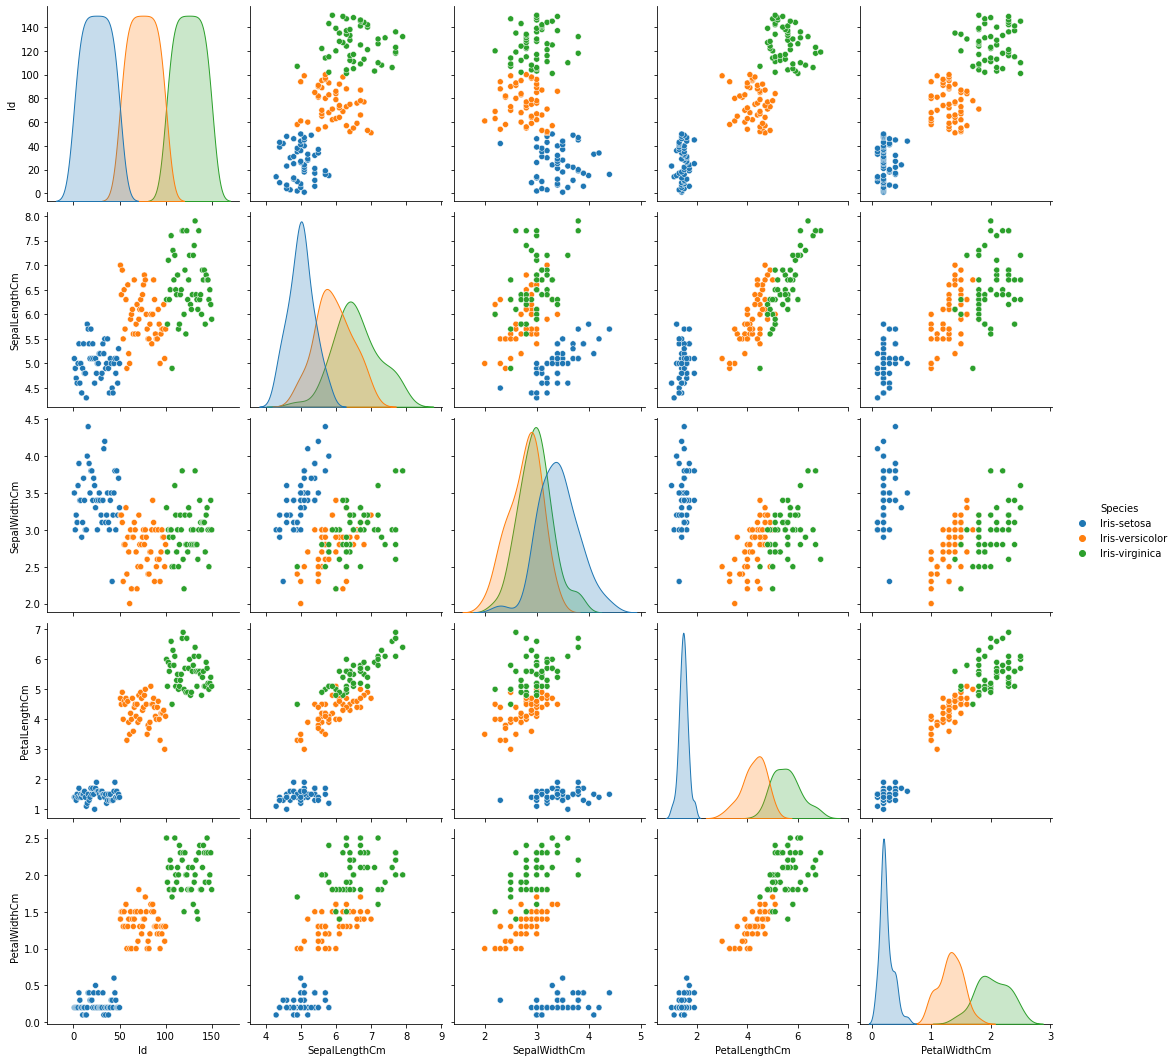

In [41]:
import seaborn as sb
sb.pairplot(iris_data, hue = 'Species', size = 3)

In [42]:
iris_data.shape(0)

TypeError: 'tuple' object is not callable